In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from taxipred.utils.constants import TAXI_CSV_PATH

df = pd.read_csv(TAXI_CSV_PATH)

# conclusion

In [53]:
# Since Passenger_Count is the only numerical column that doesnt have a big impact on the price, I decided to drop it, 
# I'll fill in the Nan with median values for the training data
# I want to use the categorical columns, so I will fill them with mode[0], the most common vaiable, and then create a dummy df
numeric_columns = ['Trip_Distance_km', 'Base_Fare', 'Passenger_Count',
                   'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

categorical_columns = ['Time_of_Day','Day_of_Week', 'Traffic_Conditions', 'Weather']
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().sum()

Trip_Distance_km          0
Time_of_Day               0
Day_of_Week               0
Passenger_Count           0
Traffic_Conditions        0
Weather                   0
Base_Fare                 0
Per_Km_Rate               0
Per_Minute_Rate           0
Trip_Duration_Minutes     0
Trip_Price               49
dtype: int64

In [54]:
df_dummy = pd.get_dummies(df)
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Trip_Distance_km           1000 non-null   float64
 1   Passenger_Count            1000 non-null   float64
 2   Base_Fare                  1000 non-null   float64
 3   Per_Km_Rate                1000 non-null   float64
 4   Per_Minute_Rate            1000 non-null   float64
 5   Trip_Duration_Minutes      1000 non-null   float64
 6   Trip_Price                 951 non-null    float64
 7   Time_of_Day_Afternoon      1000 non-null   bool   
 8   Time_of_Day_Evening        1000 non-null   bool   
 9   Time_of_Day_Morning        1000 non-null   bool   
 10  Time_of_Day_Night          1000 non-null   bool   
 11  Day_of_Week_Weekday        1000 non-null   bool   
 12  Day_of_Week_Weekend        1000 non-null   bool   
 13  Traffic_Conditions_High    1000 non-null   bool  

In [55]:
# dropping rows with Nan values in the target column for the training data
# drop the Passenger_Count column, I will not use it for training the model
df_training_model = df_dummy.dropna(subset=["Trip_Price"])
df_training_model = df_training_model.drop("Passenger_Count", axis = 1)
df_training_model.isnull().sum()

Trip_Distance_km             0
Base_Fare                    0
Per_Km_Rate                  0
Per_Minute_Rate              0
Trip_Duration_Minutes        0
Trip_Price                   0
Time_of_Day_Afternoon        0
Time_of_Day_Evening          0
Time_of_Day_Morning          0
Time_of_Day_Night            0
Day_of_Week_Weekday          0
Day_of_Week_Weekend          0
Traffic_Conditions_High      0
Traffic_Conditions_Low       0
Traffic_Conditions_Medium    0
Weather_Clear                0
Weather_Rain                 0
Weather_Snow                 0
dtype: int64

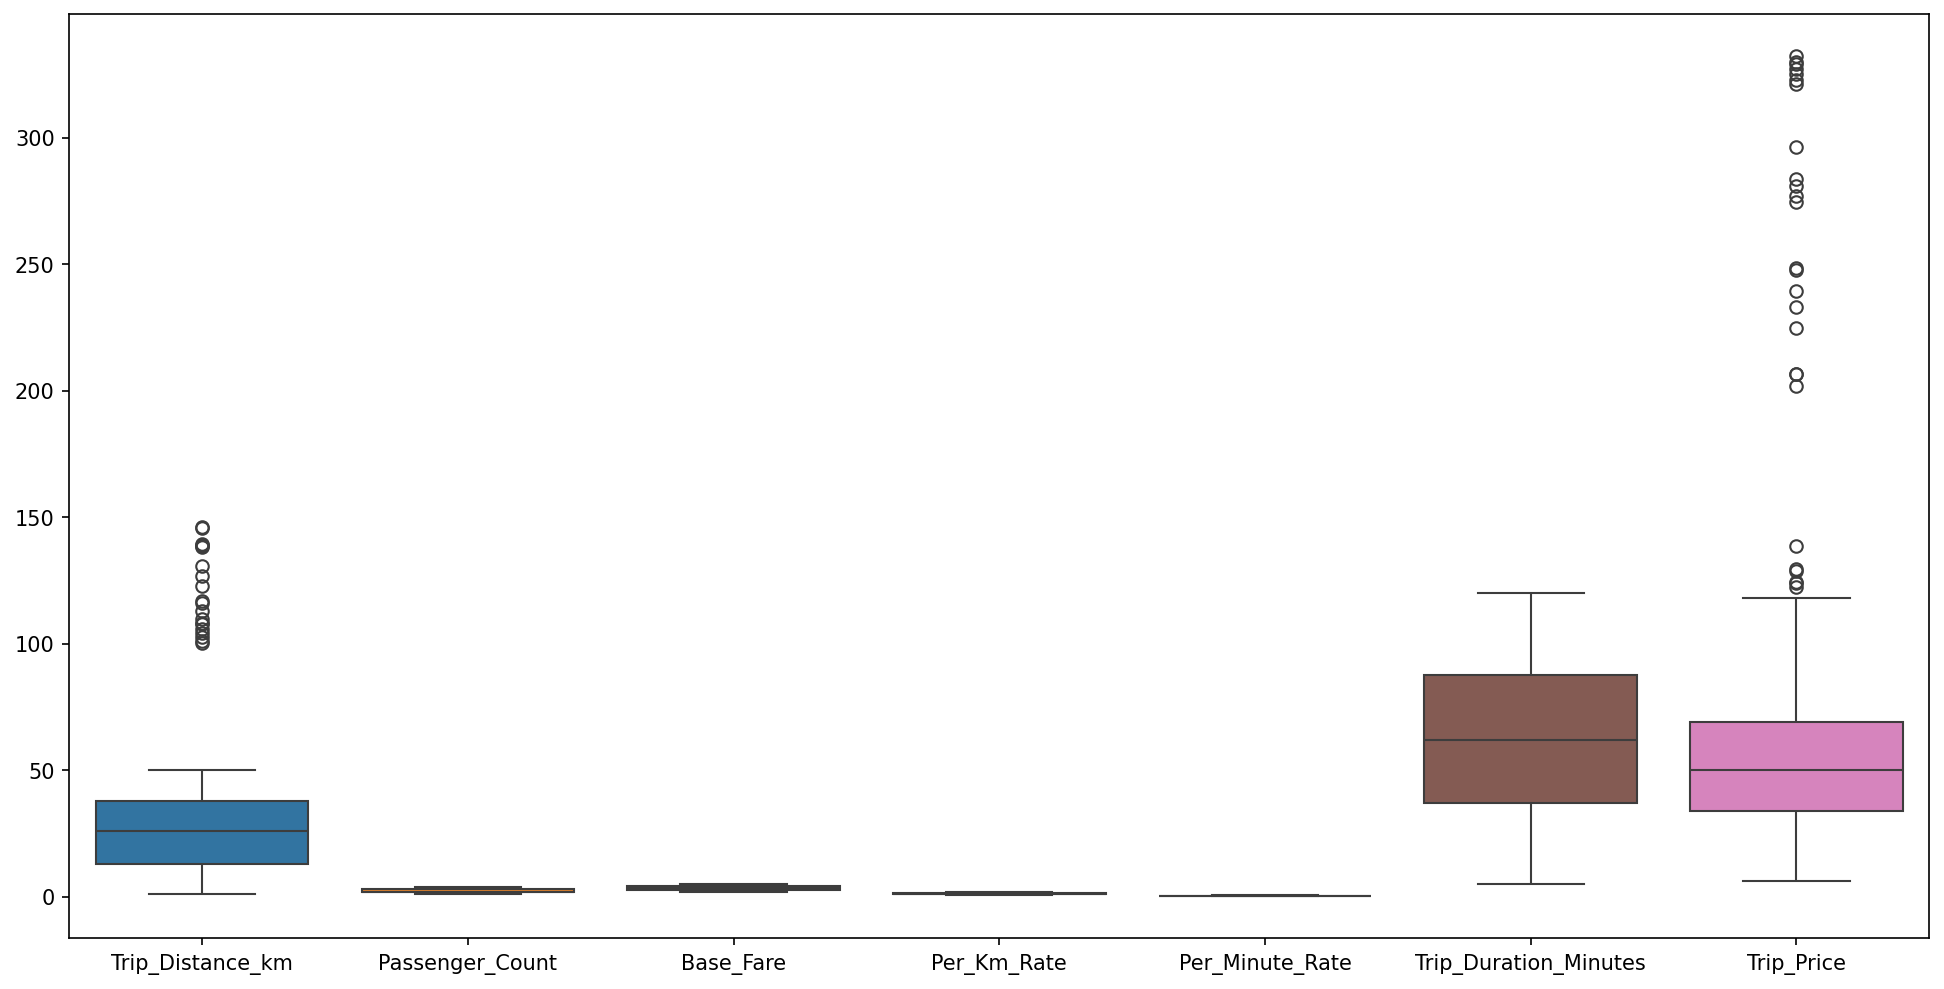

In [56]:
# boxplot for outliers in the numeric columns
fig, ax = plt.subplots(1, figsize = (16, 8), dpi = 150)
sns.boxplot(df);

In [57]:
# remove the outliers from the dataframe
Q1 = df_training_model["Trip_Price"].quantile(0.25)
Q3 = df_training_model["Trip_Price"].quantile(0.75)
IQR = Q3 - Q1
low_bound = Q1 - 1.5 * IQR
high_bound = Q3 + 1.5 * IQR

df_training_model = df_training_model[
    (df_training_model["Trip_Price"] > low_bound)
    & (df_training_model["Trip_Price"] < high_bound)
]


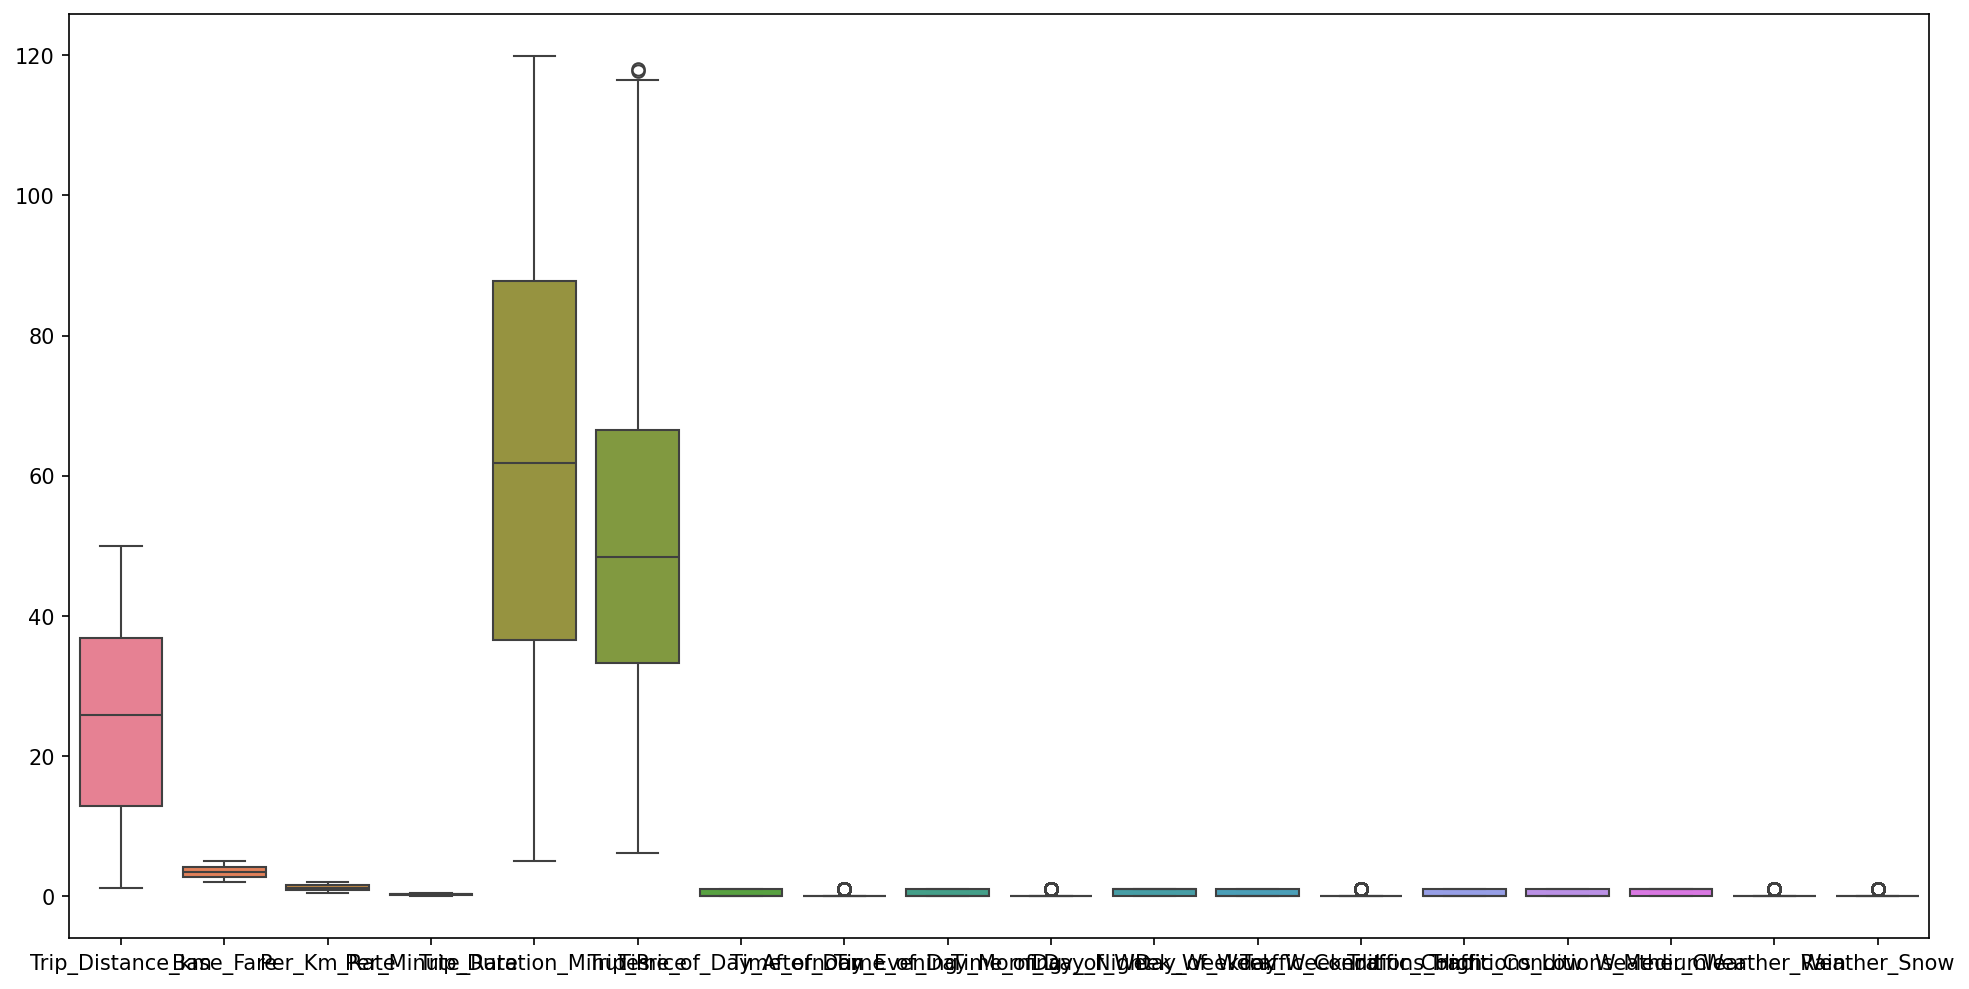

In [58]:
fig, ax = plt.subplots(1, figsize = (16, 8), dpi = 150)
sns.boxplot(df_training_model);

In [59]:
df_training_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 925 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Trip_Distance_km           925 non-null    float64
 1   Base_Fare                  925 non-null    float64
 2   Per_Km_Rate                925 non-null    float64
 3   Per_Minute_Rate            925 non-null    float64
 4   Trip_Duration_Minutes      925 non-null    float64
 5   Trip_Price                 925 non-null    float64
 6   Time_of_Day_Afternoon      925 non-null    bool   
 7   Time_of_Day_Evening        925 non-null    bool   
 8   Time_of_Day_Morning        925 non-null    bool   
 9   Time_of_Day_Night          925 non-null    bool   
 10  Day_of_Week_Weekday        925 non-null    bool   
 11  Day_of_Week_Weekend        925 non-null    bool   
 12  Traffic_Conditions_High    925 non-null    bool   
 13  Traffic_Conditions_Low     925 non-null    bool   
 14 

In [60]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Time_of_Day            1000 non-null   object 
 2   Day_of_Week            1000 non-null   object 
 3   Passenger_Count        1000 non-null   float64
 4   Traffic_Conditions     1000 non-null   object 
 5   Weather                1000 non-null   object 
 6   Base_Fare              1000 non-null   float64
 7   Per_Km_Rate            1000 non-null   float64
 8   Per_Minute_Rate        1000 non-null   float64
 9   Trip_Duration_Minutes  1000 non-null   float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [61]:
# save the cleaned data, one for model training
# save one for dashboard plots, and user input

path_clean_training = "../src/taxipred/data/training_data.csv"
path_clean = "../src/taxipred/data/user_data.csv"

df_training_model.to_csv(path_clean_training, index=False)
df.to_csv(path_clean, index=False)

print(f"Files saved successfully to:\n{path_clean_training}\n{path_clean}")

Files saved successfully to:
../src/taxipred/data/training_data.csv
../src/taxipred/data/user_data.csv
